In [1]:
import pandas as pd
from matplotlib import pyplot as plt, figure
import seaborn as sns
import numpy as np

In [2]:
dtype_map = {
    'MSSubClass': 'category',
    'MSZoning': 'category',
    'LotFrontage': 'float64',
    'LotArea': 'int64',
    'Street': 'category',
    'Alley': 'category',
    'LotShape': 'category',
    'LandContour': 'category',
    'Utilities': 'category',
    'LotConfig': 'category',
    'LandSlope': 'category',
    'Neighborhood': 'category',
    'Condition1': 'category',
    'Condition2': 'category',
    'BldgType': 'category',
    'HouseStyle': 'category',
    'OverallQual': 'category',
    'OverallCond': 'category',
    'YearBuilt': 'int64',
    'YearRemodAdd': 'int64',
    'RoofStyle': 'category',
    'RoofMatl': 'category',
    'Exterior1st': 'category',
    'Exterior2nd': 'category',
    'MasVnrType': 'category',
    'MasVnrArea': 'float64',
    'ExterQual': 'category',
    'ExterCond': 'category',
    'Foundation': 'category',
    'BsmtQual': 'category',
    'BsmtCond': 'category',
    'BsmtExposure': 'category',
    'BsmtFinType1': 'category',
    'BsmtFinSF1': 'float64',
    'BsmtFinType2': 'category',
    'BsmtFinSF2': 'float64',
    'BsmtUnfSF': 'float64',
    'TotalBsmtSF': 'float64',
    'Heating': 'category',
    'HeatingQC': 'category',
    'CentralAir': 'category',
    'Electrical': 'category',
    '1stFlrSF': 'int64',
    '2ndFlrSF': 'int64',
    'LowQualFinSF': 'int64',
    'GrLivArea': 'int64',
    'BsmtFullBath': 'float64',
    'BsmtHalfBath': 'float64',
    'FullBath': 'int64',
    'HalfBath': 'int64',
    'BedroomAbvGr': 'int64',
    'KitchenAbvGr': 'int64',
    'KitchenQual': 'category',
    'TotRmsAbvGrd': 'int64',
    'Functional': 'category',
    'Fireplaces': 'int64',
    'FireplaceQu': 'category',
    'GarageType': 'category',
    'GarageYrBlt': 'float64',
    'GarageFinish': 'category',
    'GarageCars': 'float64',
    'GarageArea': 'float64',
    'GarageQual': 'category',
    'GarageCond': 'category',
    'PavedDrive': 'category',
    'WoodDeckSF': 'int64',
    'OpenPorchSF': 'int64',
    'EnclosedPorch': 'int64',
    '3SsnPorch': 'int64',
    'ScreenPorch': 'int64',
    'PoolArea': 'int64',
    'PoolQC': 'category',
    'Fence': 'category',
    'MiscFeature': 'category',
    'MiscVal': 'int64',
    'MoSold': 'int64',
    'YrSold': 'int64',
    'SaleType': 'category',
    'SaleCondition': 'category',
    'SalePrice': 'float64'
}

df = pd.read_csv('cleaned_dataset.csv',dtype = dtype_map)


Text(0.5, 1.0, 'Count of Houses by Neighborhood')

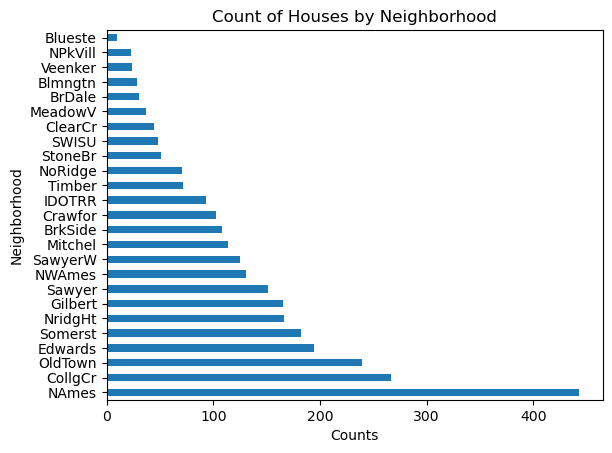

In [3]:
# Distribution of housing by neighborhood
_ = df.Neighborhood.value_counts().plot(kind='barh')
_.set_xlabel('Counts')
_.set_ylabel('Neighborhood')
_.set_title('Count of Houses by Neighborhood')


We see that North Ames has significantly more houses than the rest of the neighborhoods meaning it could be a popping location


<Axes: xlabel='SalePrice', ylabel='Count'>

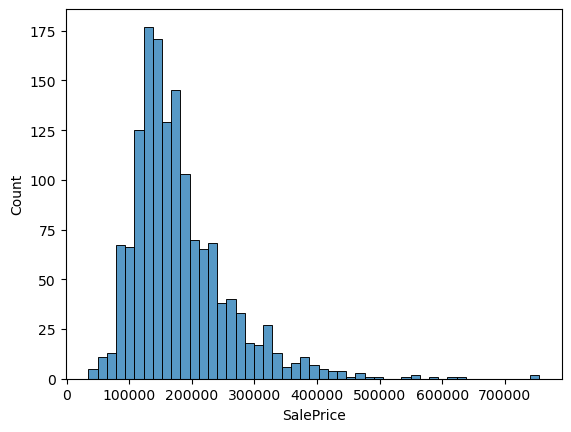

In [4]:
#Let's look at the distribution of the Sale Price of the houses
sns.histplot(data = df, x = df['SalePrice'])

In [5]:

q1 = df['SalePrice'].quantile(.25)
q3 = df['SalePrice'].quantile(.75)
iqr = q3-q1
outliers = df['SalePrice'][((df['SalePrice']<(q1-1.5*iqr)) | (df['SalePrice']>(q3+1.5*iqr)))]
df_outliers = df[['Neighborhood','SalePrice']][df['SalePrice'].isin(outliers)]
df_outliers

,Neighborhood,SalePrice
11,NridgHt,345000.0
53,Veenker,385000.0
58,StoneBr,438780.0
112,CollgCr,383970.0
151,NridgHt,372402.0
...,...,...
1268,Crawfor,381000.0
1353,NoRidge,410000.0
1373,NoRidge,466500.0
1388,Gilbert,377500.0


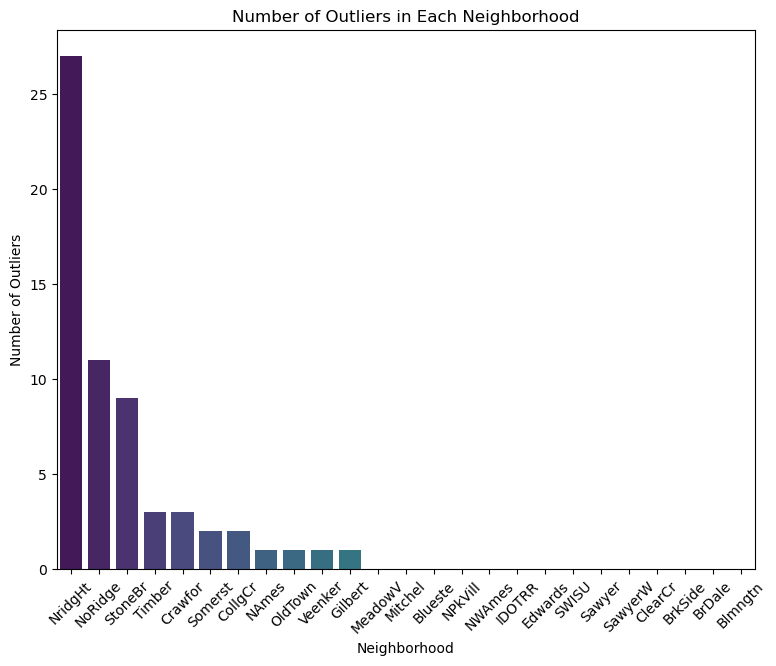

In [6]:
# Count the number of outliers in each neighborhood
outlier_counts = df_outliers['Neighborhood'].value_counts().reset_index()
outlier_counts.columns = ['Neighborhood', 'Outliers']

# Create a bar plot to show the number of outliers in each neighborhood
plt.figure(figsize=(9, 7))
sns.barplot(x='Neighborhood', y='Outliers', data=outlier_counts, palette='viridis', order = outlier_counts['Neighborhood'])

# Adding labels and title
plt.xlabel('Neighborhood')
plt.ylabel('Number of Outliers')
plt.title('Number of Outliers in Each Neighborhood')

# Rotate the x labels to avoid overlapping
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [7]:
df_outliers_inspection = df[df['SalePrice'].isin(outliers)]
df_outliers_inspection.sort_values(by='SalePrice', ascending = False)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000.0
1182,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000.0
1169,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000.0
898,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657.0
803,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2009,New,Partial,582933.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,60,RL,82.0,9452,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,348000.0
642,80,RL,75.0,13860,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,7,2009,WD,Normal,345000.0
11,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000.0
320,60,RL,111.0,16259,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,342643.0


In [71]:
# checking the mean lotArea of the outliers
df_outliers_inspection['LotArea'].mean()

18808.70491803279

In [72]:
# comparing it to the overall mean of the dataframe's lotArea column
df['LotArea'].mean()

10168.11408016444

We see the outlier's lotArea mean is significantly higher than the overall dataframe's which could explain the higher SalePrice for the "outliers".

In [8]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [9]:
df[['Neighborhood','LotArea']][df['SalePrice'] == 755000.000000]

,Neighborhood,LotArea
691,NoRidge,21535


After doing research on real estate in Northridge Ames Iowa, the average price for a home with an estimated lot area of 21535 sqare feet is approximately 741250 dollars which is close to the actual price of 755,000 dollars. Therefore, I can conclude that this is a valid point and not an outlier that should be included in my analysis. 

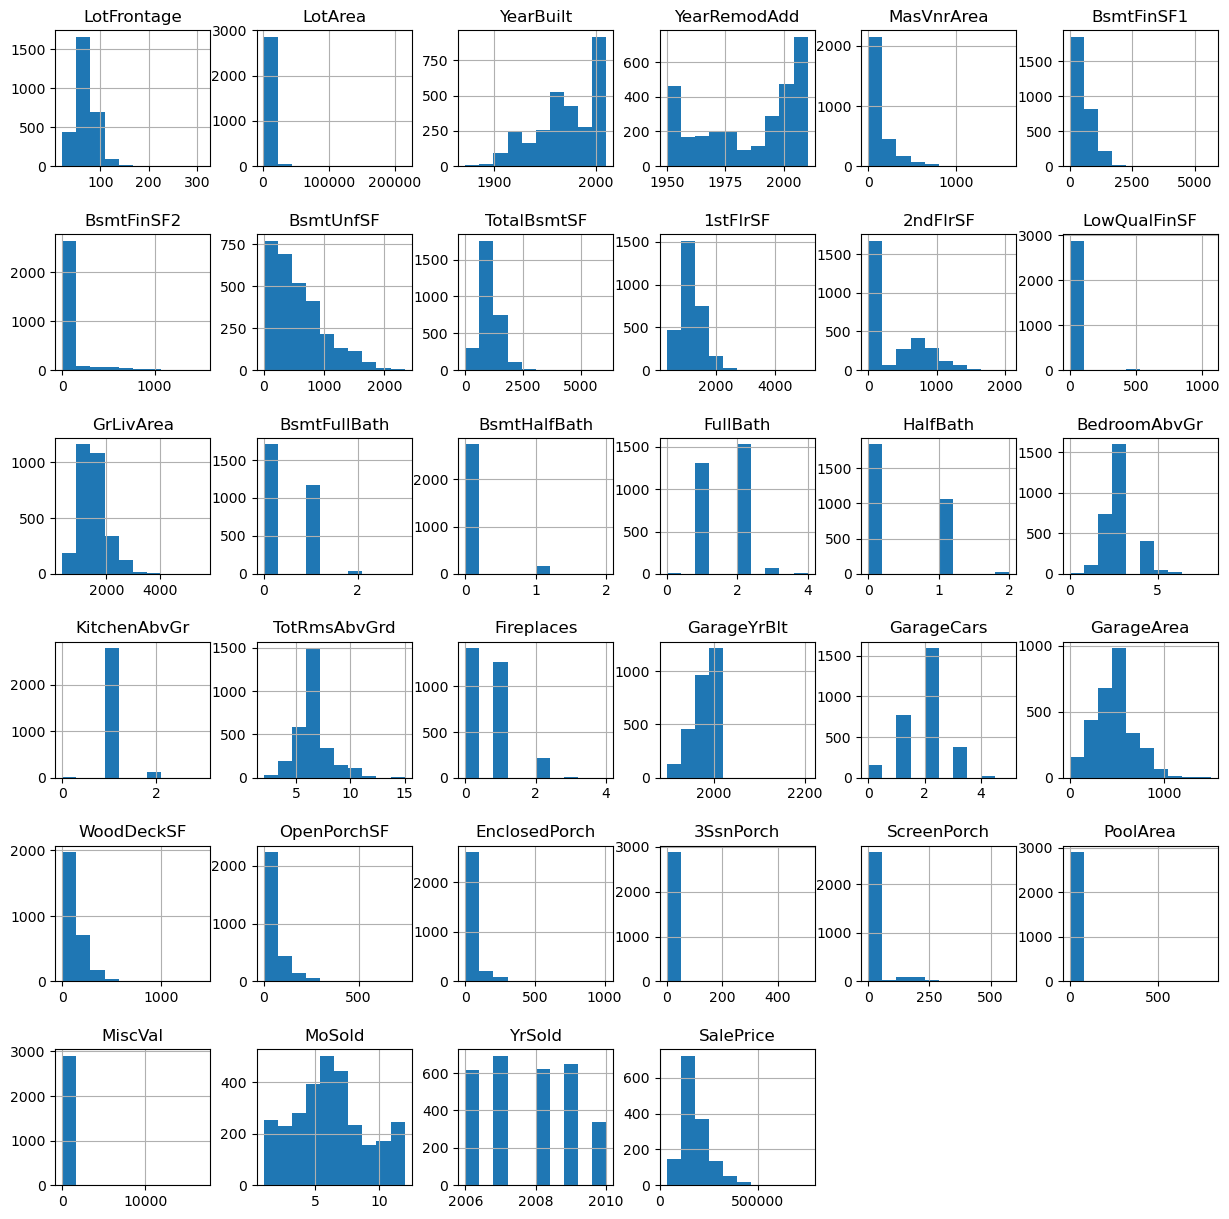

In [10]:
# Looking at the distribution of all the features
df.hist(figsize=(15, 15))
plt.subplots_adjust(hspace=0.5);

Text(0.5, 1.0, 'Mean Sale Price By Neighborhood')

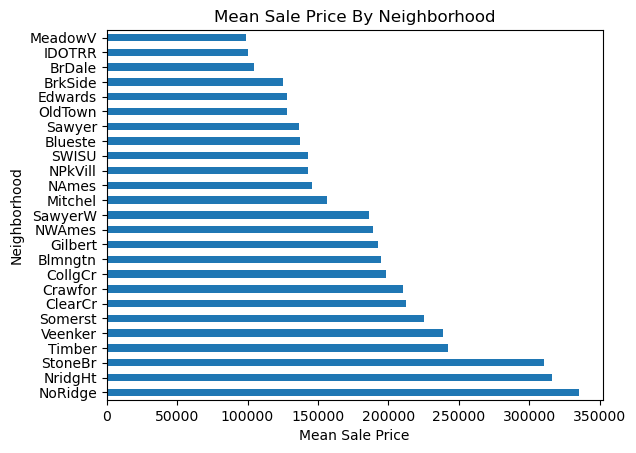

In [11]:
# Plotting which neigborhood has the highest mean of sale price 
meanSalePriceByNeighbor = df.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending = False).plot(kind = 'barh')
meanSalePriceByNeighbor.set_xlabel('Mean Sale Price')
meanSalePriceByNeighbor.set_title('Mean Sale Price By Neighborhood')

Looking at the bar plot we see that NoRidge,NridgHt, and StoneBr have the highest mean sale price, meaning they could be the most expensive locations

/var/folders/89/6fzhsz8d7w9_ygrt6ph8d5yr0000gn/T/ipykernel_84061/1381668183.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr()[np.abs(df.corr())>0.3], annot= True)


<Axes: >

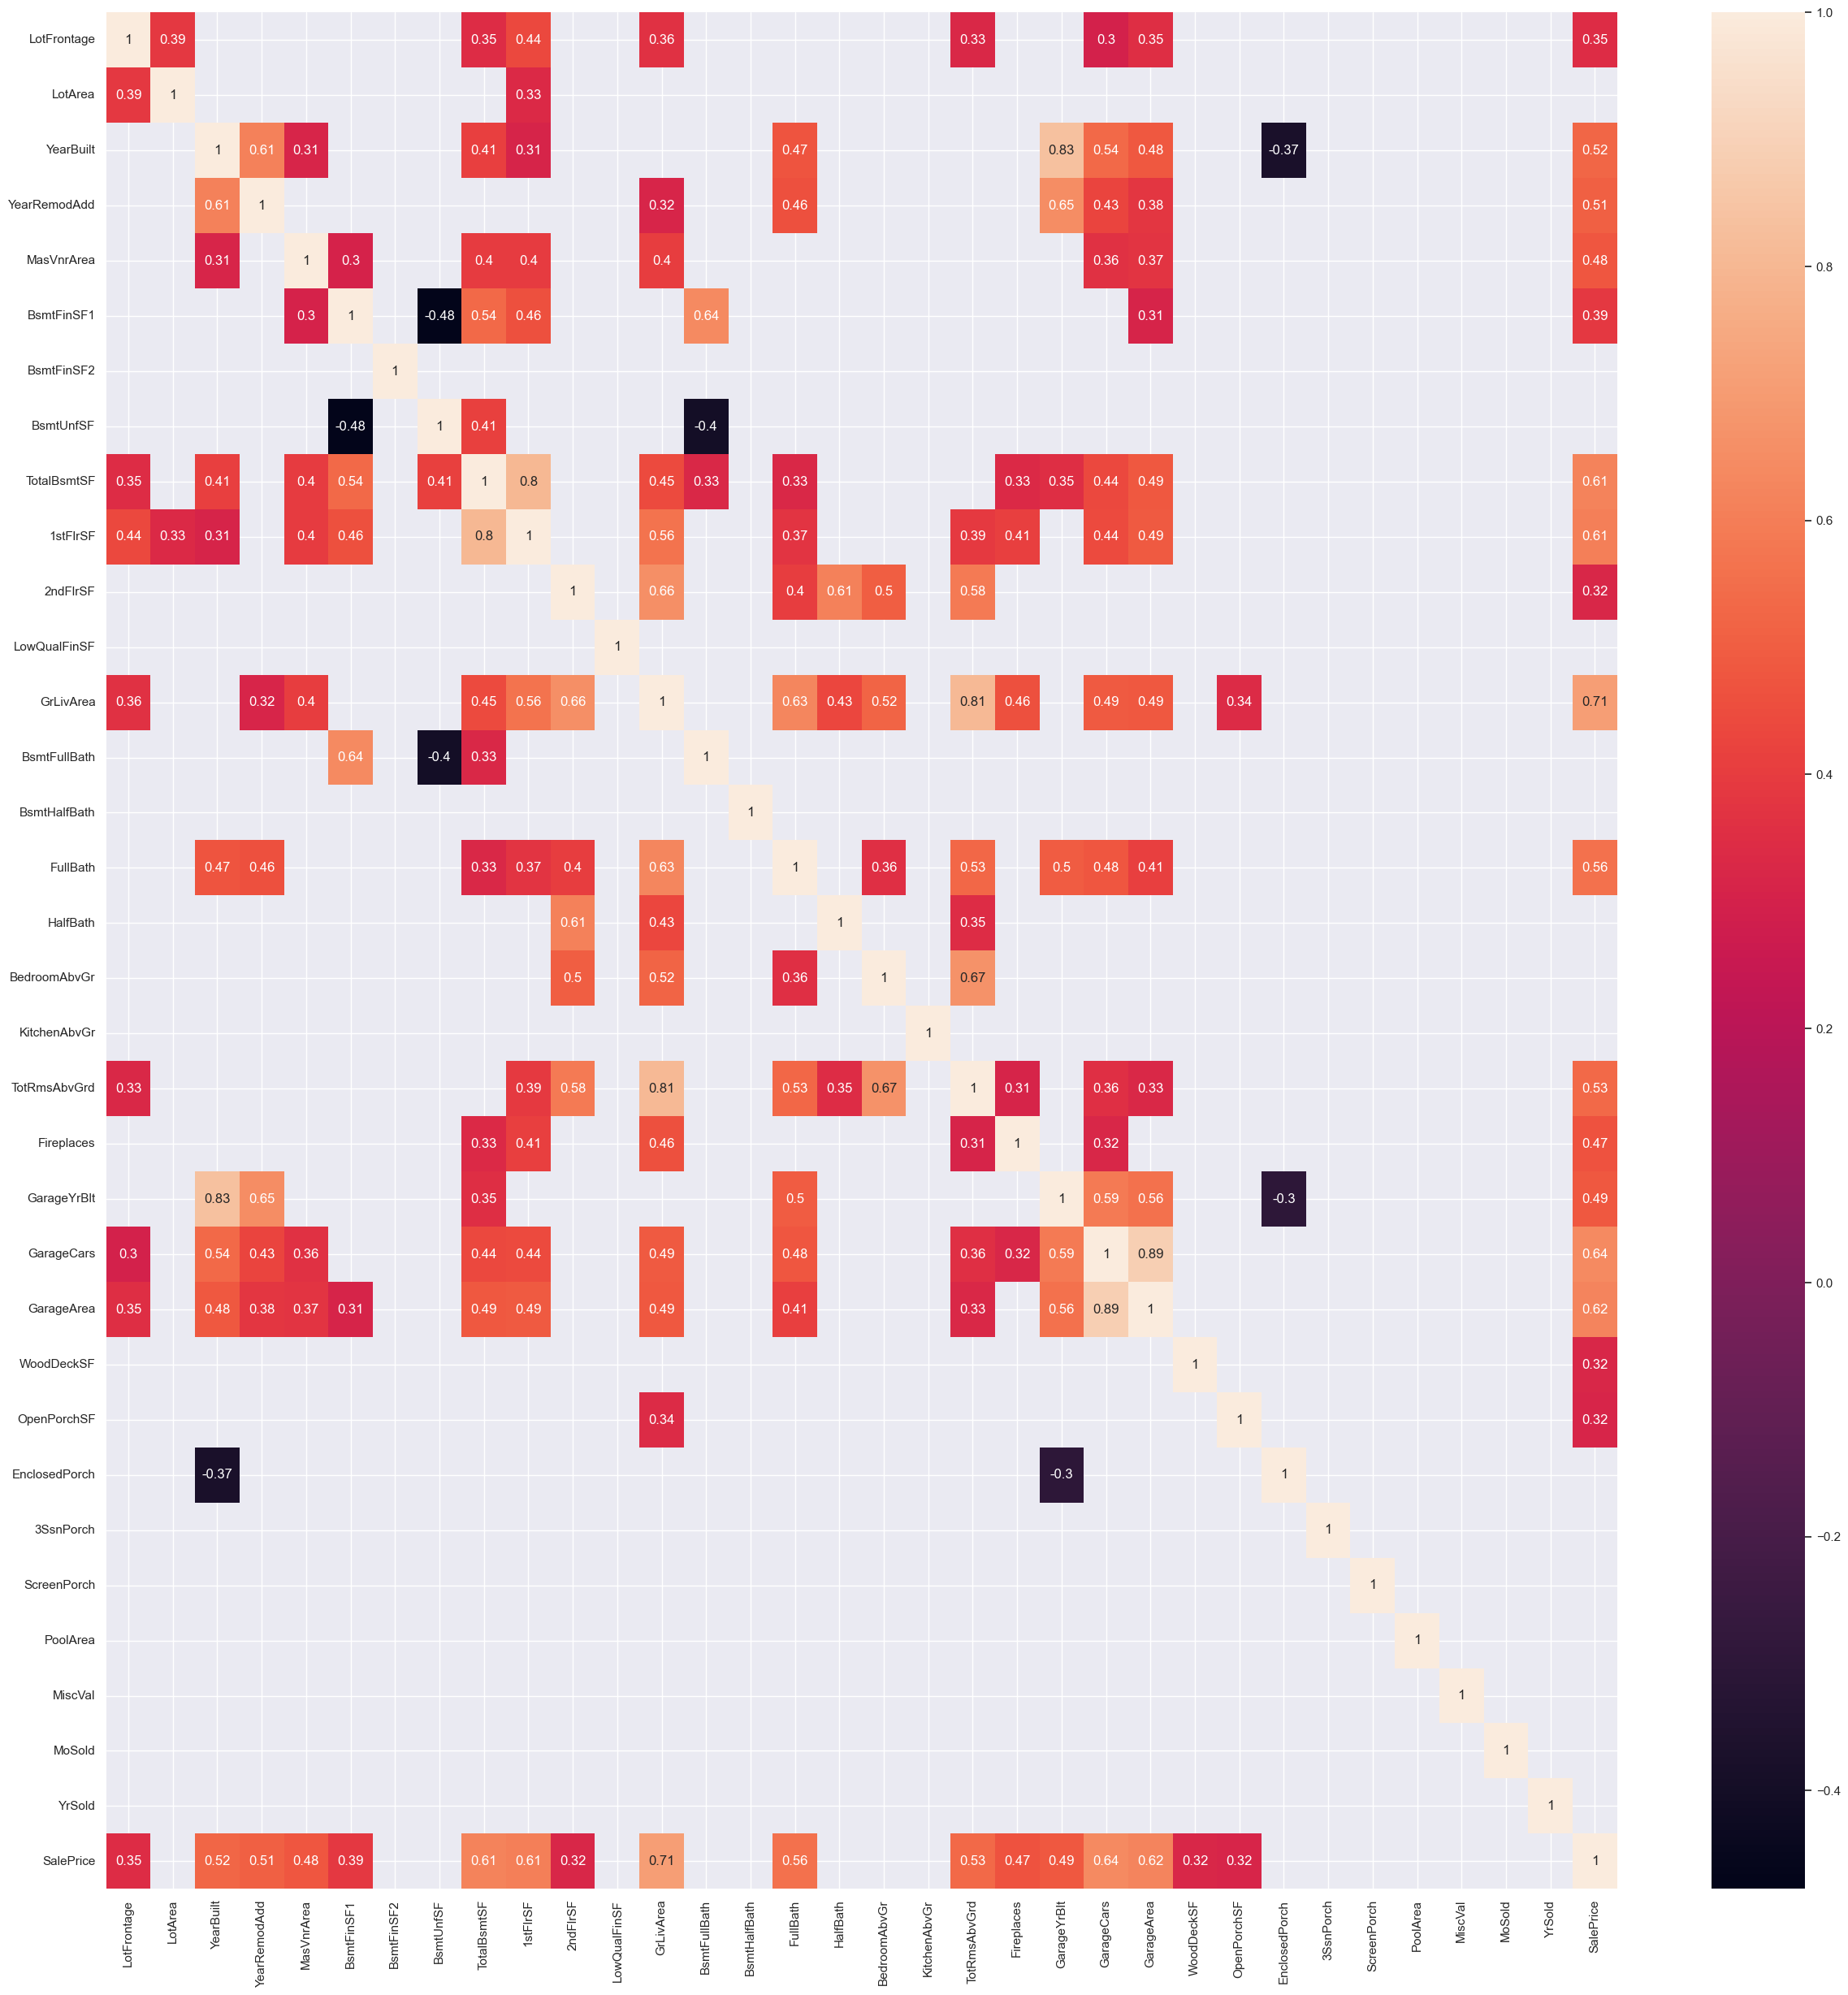

In [12]:
sns.set(rc={'figure.figsize':(30,30)})
sns.heatmap(df.corr()[np.abs(df.corr())>0.3], annot= True)



Things I noticed from the heatmap: Sale Price is strongly correlated with GLivArea, TotalBsmntSf, 1stFlrSF, GarageCars, and GarageArea.

I am also going to remove GarageYrBuilt because it has a very strong correlation with YearBuilt. Therefore, I can just consider YearBuilt. Also, contexually, most garages were built the same year that the house was built.

I additionally will remove GarageCars as it is highly correlated with GarageArea. I will just substitute it by using GarageArea as it is a more accurate depiction of the size of the garage. 

In [13]:

print(df.dtypes.to_string())


MSSubClass       category
MSZoning         category
LotFrontage       float64
LotArea             int64
Street           category
Alley            category
LotShape         category
LandContour      category
Utilities        category
LotConfig        category
LandSlope        category
Neighborhood     category
Condition1       category
Condition2       category
BldgType         category
HouseStyle       category
OverallQual      category
OverallCond      category
YearBuilt           int64
YearRemodAdd        int64
RoofStyle        category
RoofMatl         category
Exterior1st      category
Exterior2nd      category
MasVnrType       category
MasVnrArea        float64
ExterQual        category
ExterCond        category
Foundation       category
BsmtQual         category
BsmtCond         category
BsmtExposure     category
BsmtFinType1     category
BsmtFinSF1        float64
BsmtFinType2     category
BsmtFinSF2        float64
BsmtUnfSF         float64
TotalBsmtSF       float64
Heating     

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

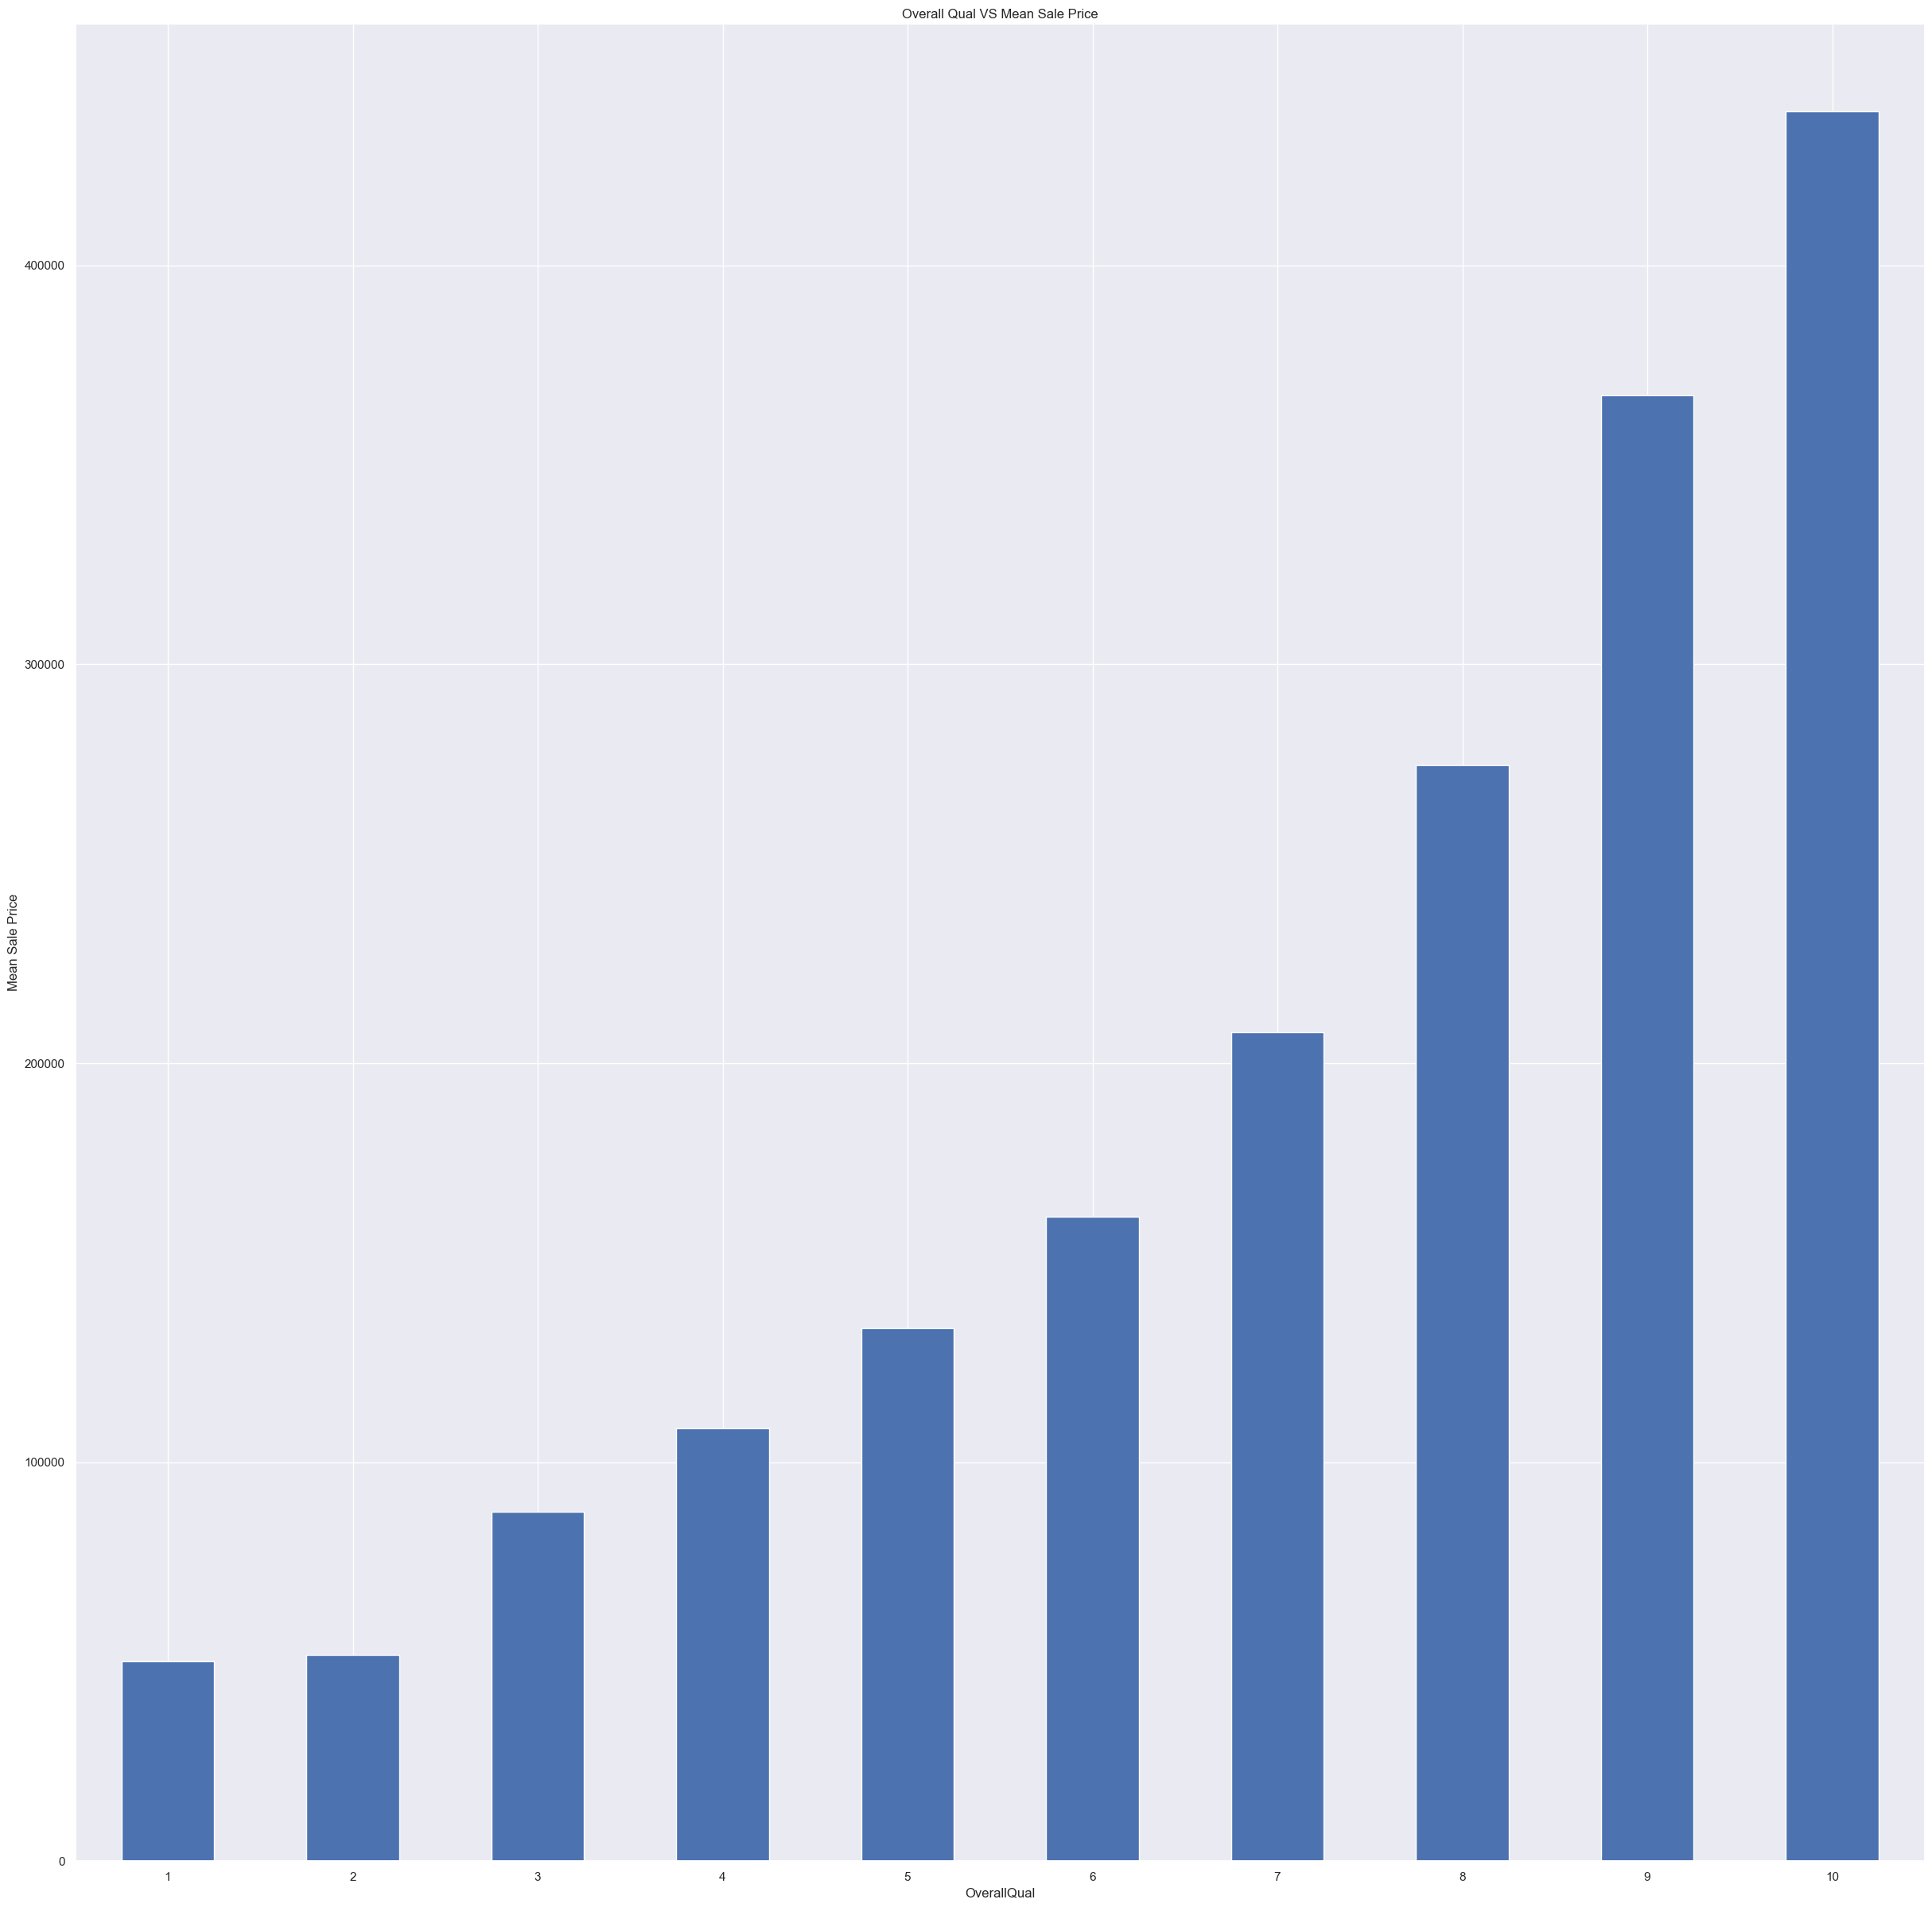

In [14]:
meanSalePriceByQual = df.groupby('OverallQual')['SalePrice'].mean().sort_values(ascending = True).plot(kind = 'bar')

plt.title('Overall Qual VS Mean Sale Price')
plt.ylabel("Mean Sale Price")
plt.xticks(rotation=0)


The higher the quality the higher the mean sale price. This is what I expected. Therefore, I can conclude that to some extent overall quality is correlated with Sale Price. 